# Thresholding

One of the most important and fundamental operations in computer vision pipelines is image thresholding. It is often used to create binary images that can then be used for follow-on processing tasks. In this notebook there are two types of thresholding techniques

+ Global thresholding
+ Adaptative thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

## 1. Global Thresholding

Binary images are used extensively in computervision applications, as they allow you to selectively process specific regions of an image, keeping the other regions intact. Image thresholding is used to create binary images from grayscale images. You can use different thresholds to create different binary images from the same original image using the **threshold()** function.

This function has four required arguments:

1. src: The image we want to threshold
2. thresh: The global threshold value that you specify
3. maxval: The maximum value that's used for create a binary map
4. type: The type of thresholding that's going to be performed

We will be using a binary threshold type. The way that this works is that all pixels in the image are compared to the global threshold and if they are **less than or equal** to this threshold all the pixels in the binary map are set to zero, and if they are grater than this threshold then the pixels are set to the maximum value which is tipically 255.

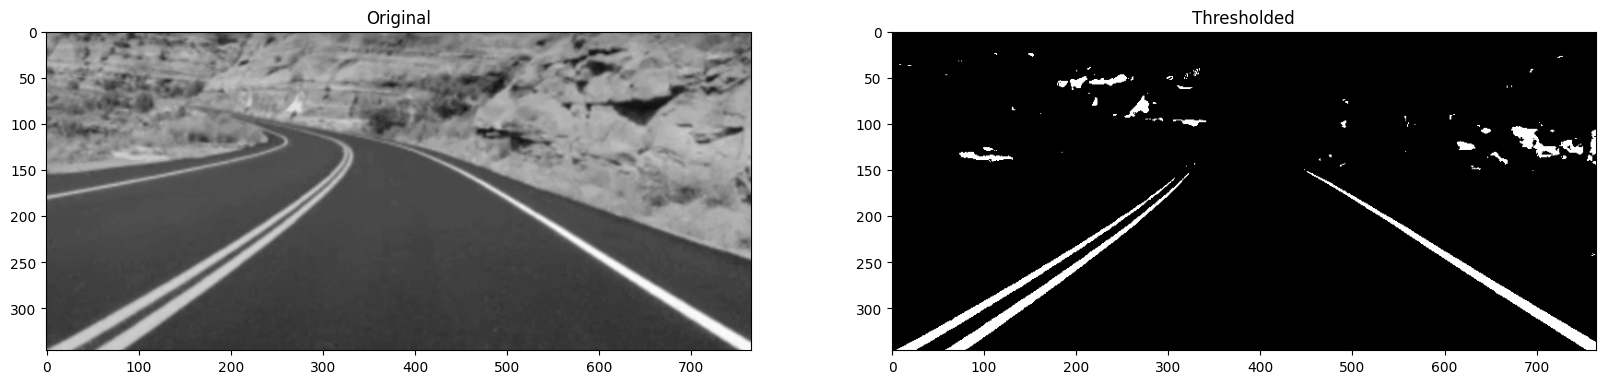

In [2]:
# Lane detection example.
# Read the image in grayscale.
img = cv2.imread("../module02/road_lanes.png", cv2.IMREAD_GRAYSCALE)

# Perform binary thresholding.
retval, img_thresh = cv2.threshold(img, 165, 255, cv2.THRESH_BINARY)

# Display the images.
plt.figure(figsize=(20, 8))
plt.subplot(121); plt.imshow(img); plt.title("Original")
plt.subplot(122); plt.imshow(img_thresh); plt.title("Thresholded");

## 2. Adaptive Thresholding

Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take at an example.

---

There is a function in OpenCV called adaptiveThreshold, it has six required arguments:

1. src: The image to performe thresholding on
2. maxValue: The maximum value for the binary map
3. adaptiveMethod: The method used for adaptive thresholding
4. thresholdType: The type of threshold (like binary threshold)
5. blockSize: Tuning parameter for the adaptive method
5. C: Also a tuning parameter for the adaptive method

---

The idea here is rather than specifying a single global threshold, the adaptive method computes a threshold spatially across the image.

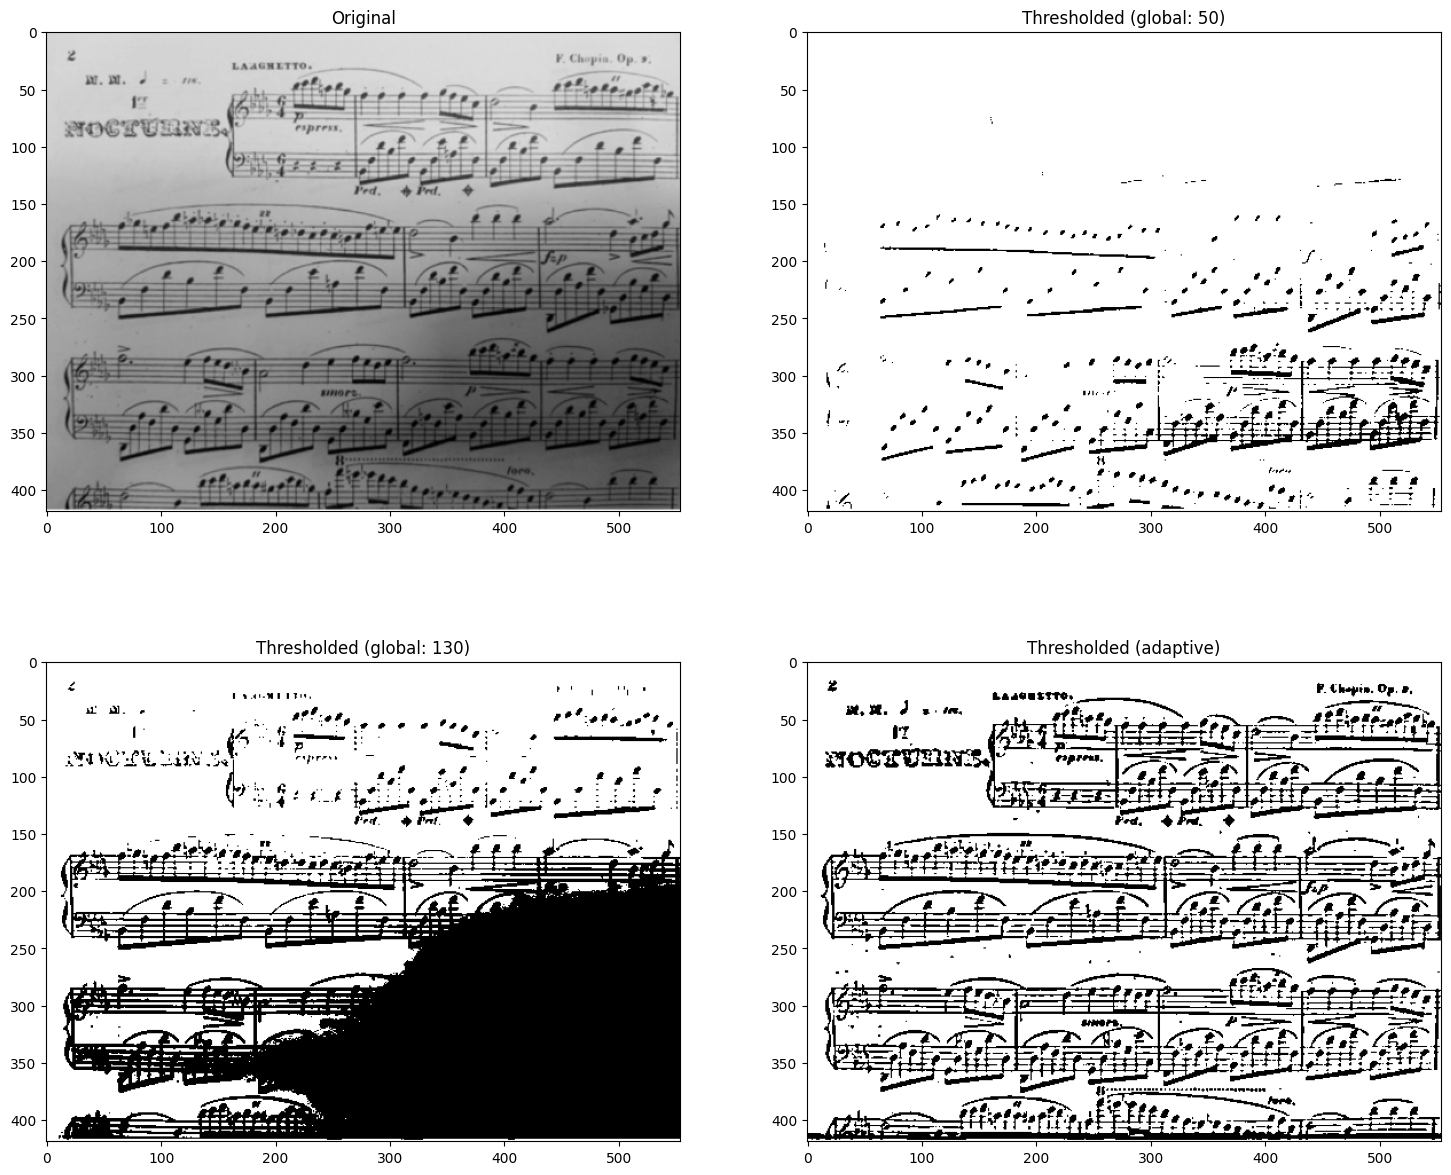

In [3]:
# Sheet music reader.
# Read the original image.
img = cv2.imread("../module02/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding.
retval, img_thresh_gbl_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding.
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding.
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

# Display the images.
plt.figure(figsize=(18, 15))
plt.subplot(221); plt.imshow(img); plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp); plt.title("Thresholded (adaptive)");

### Exercice

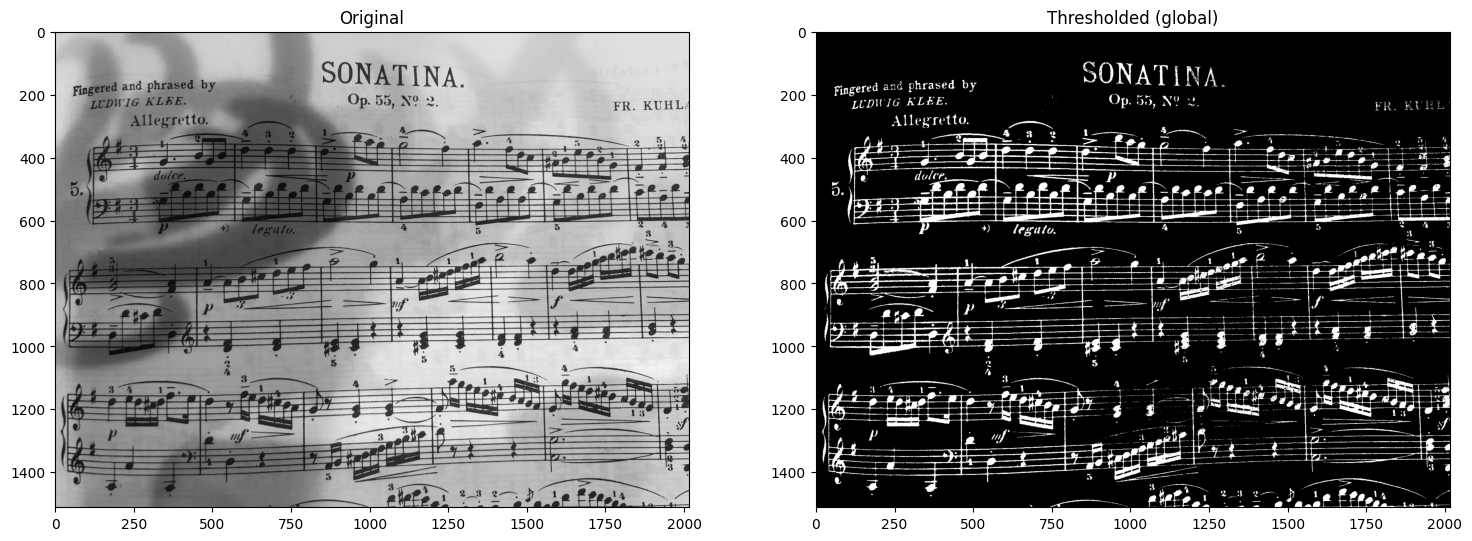

In [12]:
img = cv2.imread("../module02/Sheet_Music_Test-1.jpg", cv2.IMREAD_GRAYSCALE)

retval, image_threshold = cv2.threshold(img, 63, 255, cv2.THRESH_BINARY_INV)

# Display the images.
plt.figure(figsize=(18, 15))
plt.subplot(121); plt.imshow(img); plt.title("Original")
plt.subplot(122); plt.imshow(image_threshold); plt.title("Thresholded (global)");